Método de la Secante:
Estimaciones iniciales: (-3, -2), Raíz: 1.2418965630165204, Iteraciones: 14
Estimaciones iniciales: (0, 1), Raíz: 1.2418965622383216, Iteraciones: 7
Estimaciones iniciales: (2, 3), Raíz: 1.2418965630456138, Iteraciones: 8

Método de la Bisección:
Intervalo inicial: [-3, 3], Raíz: 1.241896390914917, Iteraciones: 23


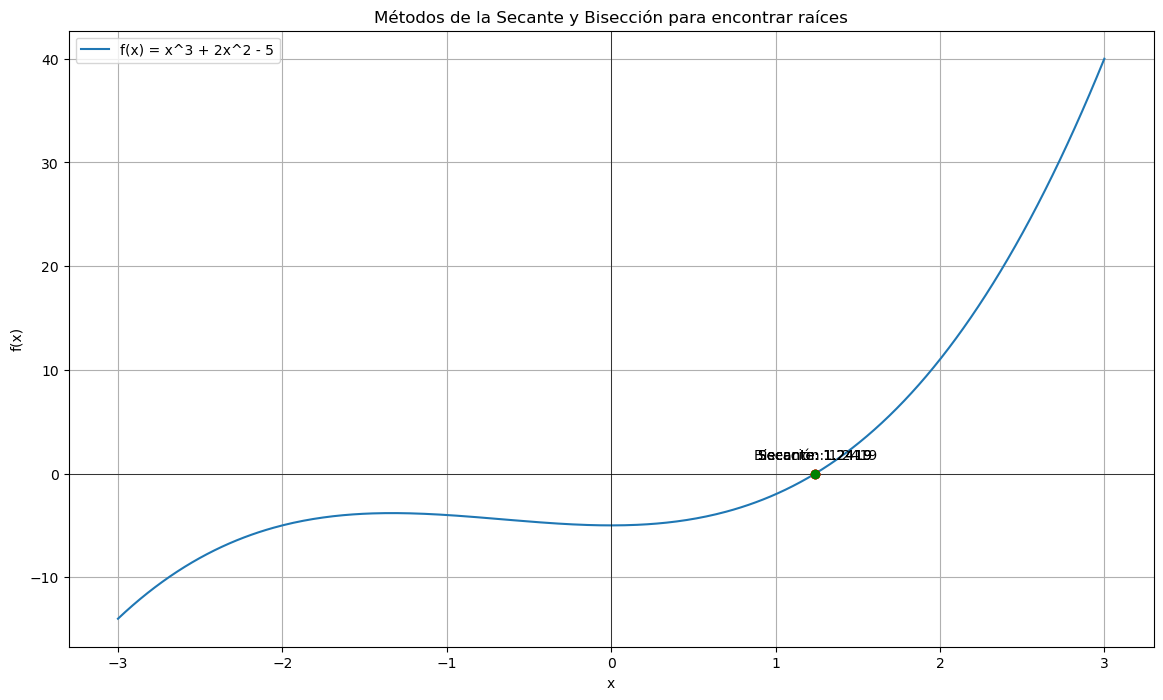

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def f(x):
    return x**3 + 2*x**2 - 5

# Método de la secante
def secante(f, x0, x1, tol=1e-6, max_iter=100):
    iteraciones = 0
    for i in range(max_iter):
        iteraciones += 1
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1, iteraciones
        if fx1 == fx0:
            raise ValueError("División por cero en el método de la secante.")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
    raise ValueError("El método de la secante no convergió después de {} iteraciones".format(max_iter))

# Método de la bisección
def biseccion(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    iteraciones = 0
    for i in range(max_iter):
        iteraciones += 1
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, iteraciones
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    raise ValueError("El método de la bisección no convergió después de {} iteraciones".format(max_iter))

# Parámetros
tol = 1e-6
max_iter = 100

# Secante con diferentes estimaciones iniciales
x0_values = [(-3, -2), (0, 1), (2, 3)]
secante_results = []
for x0, x1 in x0_values:
    try:
        raiz, iteraciones = secante(f, x0, x1, tol, max_iter)
        secante_results.append((x0, x1, raiz, iteraciones))
    except ValueError as e:
        secante_results.append((x0, x1, None, str(e)))

# Bisección
a, b = -3, 3
try:
    raiz_biseccion, iteraciones_biseccion = biseccion(f, a, b, tol, max_iter)
except ValueError as e:
    raiz_biseccion, iteraciones_biseccion = None, str(e)

# Resultados
print("Método de la Secante:")
for x0, x1, raiz, iteraciones in secante_results:
    print(f"Estimaciones iniciales: ({x0}, {x1}), Raíz: {raiz}, Iteraciones: {iteraciones}")

print("\nMétodo de la Bisección:")
print(f"Intervalo inicial: [{a}, {b}], Raíz: {raiz_biseccion}, Iteraciones: {iteraciones_biseccion}")

x = np.linspace(-3, 3, 400)
y = f(x)

plt.figure(figsize=(14, 8))
plt.plot(x, y, label='f(x) = x^3 + 2x^2 - 5')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

#  Secante
for x0, x1, raiz, _ in secante_results:
    if raiz is not None:
        plt.plot(raiz, f(raiz), 'ro')
        plt.annotate(f'Secante: {raiz:.4f}', (raiz, f(raiz)), textcoords="offset points", xytext=(0,10), ha='center')

#  Bisección
if raiz_biseccion is not None:
    plt.plot(raiz_biseccion, f(raiz_biseccion), 'go')
    plt.annotate(f'Bisección: {raiz_biseccion:.4f}', (raiz_biseccion, f(raiz_biseccion)), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Métodos de la Secante y Bisección para encontrar raíces')
plt.grid(True)
plt.show()